# Цель лабораторной работы:
Изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.
# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
8. Постройте кривые обучения и валидации.

### 1. Выбор набора данных (датасета) для решения задачи классификации или регресии.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor
# Enable inline plots
%matplotlib inline

In [2]:
data = pd.read_csv('data/covid_19_clean_complete.csv', sep=',')
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [3]:
data.shape 

(17136, 8)

In [4]:
data.isnull().sum() 

Province/State    11832
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [5]:
data.dtypes 

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

### 2. Заполнение пропусков и кодирование категориальных признаков

#### Заполнение пропусков

In [6]:
data = data.fillna('')
data.isnull().sum() 

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [7]:
data.dtypes 

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

#### Кодирование категориальных признаков числовыми

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Province/State'] = le.fit_transform(data['Province/State'])
data['Date'] = le.fit_transform(data['Date'])
data['Country/Region'] = le.fit_transform(data['Country/Region'])
data.dtypes

Province/State      int64
Country/Region      int64
Lat               float64
Long              float64
Date                int64
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [9]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,0,0,33.0000,65.0000,0,0,0,0
1,0,1,41.1533,20.1683,0,0,0,0
2,0,2,28.0339,1.6596,0,0,0,0
3,0,3,42.5063,1.5218,0,0,0,0
4,0,4,-11.2027,17.8739,0,0,0,0


### 3. Разделение выборки на обучающую и тестовую с использованием метода train_test_split р.

##### Х - признаки
##### У - целевые значения

In [10]:
# X = data.drop('Deaths',axis = 1).values 
# y = data['Deaths'].values 

X = data.drop('Recovered',axis = 1).values 
y = data['Recovered'].values 


# X = data.drop('Confirmed',axis = 1).values 
# y = data['Confirmed'].values 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.26, random_state=1)

In [12]:
X_train.shape

(12680, 7)

In [13]:
X_test.shape

(4456, 7)

In [14]:
y_train.shape

(12680,)

In [15]:
y_test.shape

(4456,)

### 4. Обучение модели ближайших соседей для произвольно заданного гиперпараметра K. Оценка качества модели с помощью трех подходящих для задачи метрик.

In [16]:
kn_regressor = KNeighborsRegressor(n_neighbors=7)
kn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

##### 4.1. Mean absolute error

In [17]:
mae4 = mean_absolute_error(y_test, kn_regressor.predict(X_test))
mae4

40.97425621954346

##### 4.2. Median absolute error

In [18]:
med_ae4 = median_absolute_error(y_test, kn_regressor.predict(X_test))
med_ae4

0.0

##### 4.3. r2 score

In [19]:
r2_4 = r2_score(y_test, kn_regressor.predict(X_test))
r2_4

0.959735318140834

### 5. Построение модели и оценка качества модели с использованием кросс-валидации. Проведение эксперимента с тремя различными стратегиями кросс-валидации.

In [20]:
kn_regressor = KNeighborsRegressor(n_neighbors=5)

#### K-Fold

In [21]:
cv_strategy = KFold(n_splits=10)
cv_score = cross_val_score(kn_regressor, X, y,
                           cv=cv_strategy, scoring="r2")
cv_score

array([-1.27751804e+02, -1.54274253e+01, -1.04007771e+00,  9.31358347e-01,
        8.80184066e-01,  9.16143382e-01,  9.73594491e-01,  9.90502255e-01,
        9.84883938e-01, -1.21750825e-01])

In [22]:
cv_score.mean()

-13.866439117157578

#### Repeated K-Fold

In [23]:
cv_strategy = RepeatedKFold(n_splits=5, n_repeats=2)
cv_score = cross_val_score(kn_regressor, X, y,
                           cv=cv_strategy, scoring="r2")
cv_score

array([0.68378344, 0.97013857, 0.98104506, 0.98200024, 0.98012187,
       0.98525221, 0.95034814, 0.76347546, 0.89407031, 0.98466968])

In [24]:
cv_score.mean()

0.9174904983129245

#### Shuffle Split

In [25]:
cv_strategy = ShuffleSplit(n_splits=5, test_size=0.25)
cv_score = cross_val_score(kn_regressor, X, y, cv=cv_strategy, scoring="r2")
cv_score

array([0.96649471, 0.20545483, 0.88645067, 0.86829366, 0.98402359])

In [26]:
cv_strategy = ShuffleSplit(n_splits=5, test_size=0.4)
for train, test in cv_strategy.split(X):
    print("%s %s" % (train, test))

[ 7766 12847 14526 ...  1206  6194 13842] [ 5721 11083  8444 ...   715  4629  7421]
[ 2008  9125  8357 ... 11849 16759   286] [ 5137  8468 14259 ...   755 14920  2263]
[ 8018  9796  6178 ... 15454  5151  9583] [ 8714 11028  6794 ...  7794  3967 12983]
[10589 13612  9827 ... 13908  9085  3902] [8310 8899  248 ... 4086 8628 8411]
[  506 10674 11948 ... 14809 10756 14230] [  793 11171  8334 ... 15008  2589 12688]


In [27]:
cv_score.mean()

0.7821434917444716

### 6. Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [28]:
n_range = np.array(range(1, 15, 1))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [29]:
grid_search = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                           cv=RepeatedKFold(n_splits=5, n_repeats=2),
                           scoring="r2", return_train_score=True, 
                           n_jobs=-1)

In [30]:
grid_search.fit(X, y)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=None),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [31]:
grid_search.best_params_

{'n_neighbors': 1}

In [32]:
grid_search.best_score_

0.9633345750733049

In [33]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

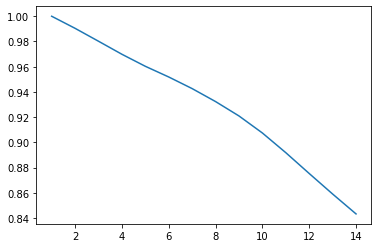

In [34]:
plt.plot(n_range, grid_search.cv_results_["mean_train_score"])

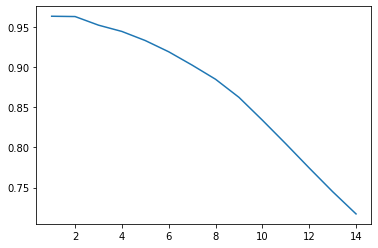

In [35]:
plt.plot(n_range, grid_search.cv_results_["mean_test_score"])

### 7. Обучение модели ближайших соседей для найденного оптимального значения гиперпараметра K. Оценка качества модели с помощью трех метрик.  Сравнение качества полученной модели с качеством модели, полученной в пункте 4.

In [36]:
kn_regressor_best = KNeighborsRegressor(**grid_search.best_params_)

In [37]:
kn_regressor_best.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

#### Сравнение качества модели с п.4
##### 7.1. Mean absolute error

In [38]:
mae7 = mean_absolute_error(y_test, kn_regressor_best.predict(X_test))
mae7

37.915170556552965

Из п.4

In [39]:
mae4

40.97425621954346

##### 7.2. Median absolute error

In [40]:
med_ae7 = median_absolute_error(y_test, kn_regressor_best.predict(X_test))
med_ae7

0.0

Из п.4

In [41]:
med_ae4

0.0

##### 7.3. r2 score

In [42]:
r2_7 = r2_score(y_test, kn_regressor_best.predict(X_test))
r2_7

0.959695197003704

Из п.4

In [43]:
r2_4

0.959735318140834

### 8. Построение кривых обучения и валидации.

In [44]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    train_sizes=np.linspace(.1, 1.0, 5)
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 
             'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 
             'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt


#### Кривая обучения

<module 'matplotlib.pyplot' from '/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/matplotlib/pyplot.py'>

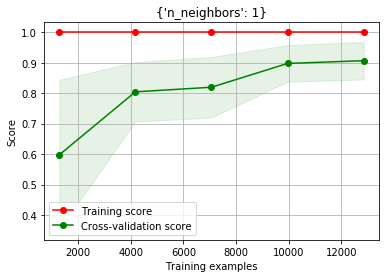

In [45]:
cv_strategy = ShuffleSplit(n_splits=5, test_size=0.25)
plot_learning_curve(kn_regressor_best,
                    str(grid_search.best_params_), X, y,
                    cv=cv_strategy)

In [46]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, cv, scoring="accuracy"):
    train_scores, test_scores = validation_curve(estimator, 
                                                 X, y,
                                                 param_name=param_name,
                                                 param_range=param_range,
                                                 cv=cv, 
                                                 scoring=scoring,
                                                 n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean,
             label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt


#### Кривая валидации

<module 'matplotlib.pyplot' from '/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/matplotlib/pyplot.py'>

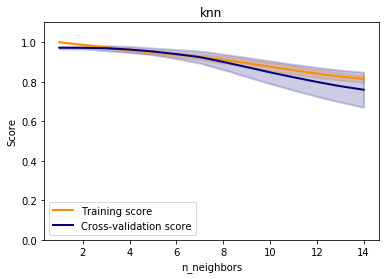

In [47]:
plot_validation_curve(KNeighborsRegressor(), "knn", X, y,
                      param_name="n_neighbors", param_range=n_range,
                      cv=cv_strategy, scoring="r2")

### Вывод:
В данной лабораторной работе были подготовлены данные, подобраны гиперпараметры на примере метода ближайших соседей.